<a href="https://colab.research.google.com/github/kkokosa/memoryexpert-course/blob/main/GC_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiments

                     label     Average  50th Percentile  90th Percentile  95th Percentile
0         addproducttocart  197.217165            185.0            257.2           290.20
1                  awesome  202.432990            189.0            301.0           336.25
2  build-your-own-computer  162.347601            160.0            240.0           265.50
3                     cart  570.087811            557.0            806.8           878.90
4                computers   78.858612             75.0            104.0           112.00
5                 homepage  182.519182            171.0            250.0           269.00
6        product-details/1   24.608301             22.0             35.0            40.00
7        product-details/2   24.771429             21.0             36.0            46.00
8           removefromcart  599.336399            587.0            831.0           901.00


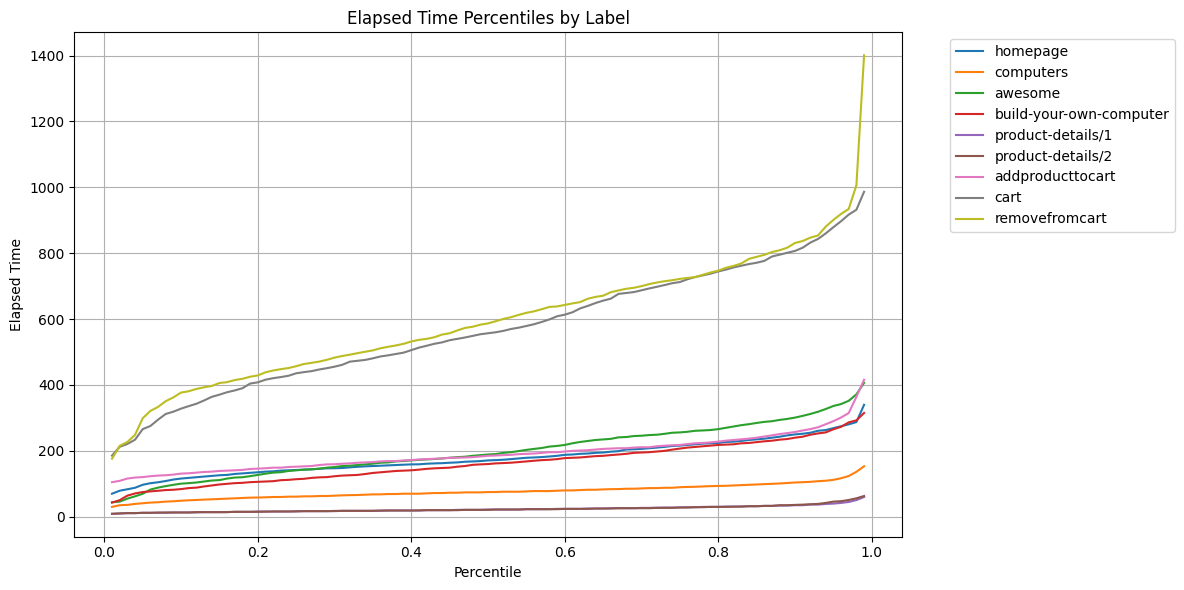

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/benchmarks/nop_jmeter_server_concurrent.csv')

# Group by label and calculate percentiles
result = df.groupby('label')['elapsed'].agg([
    ('Average', 'mean'),
    ('50th Percentile', lambda x: x.quantile(0.5)),
    ('90th Percentile', lambda x: x.quantile(0.9)),
    ('95th Percentile', lambda x: x.quantile(0.95))
]).reset_index()

# Display the result
print(result)

# Optionally, save the result to a new CSV file
# result.to_csv('result.csv', index=False)
# files.download('result.csv')

### Create a box plot

# Create percentile range
percentiles = np.arange(0.01, 1.00, 0.01)

# Calculate percentiles for each label
percentile_data = {}
for label in df['label'].unique():
    label_data = df[df['label'] == label]['elapsed']
    percentile_data[label] = np.percentile(label_data, percentiles * 100)

# Create the plot
plt.figure(figsize=(12, 6))

for label, data in percentile_data.items():
    plt.plot(percentiles, data, label=label)

plt.xlabel('Percentile')
plt.ylabel('Elapsed Time')
plt.title('Elapsed Time Percentiles by Label')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Counters

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_counter_data(directory, counter_name):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        counter_data = df[df['Counter Name'] == counter_name]
        counter_data = counter_data.sort_values('Timestamp')

        counter_data['Relative Time'] = (counter_data['Timestamp'] - counter_data['Timestamp'].min()).dt.total_seconds()

        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_counters_', '').replace('.csv', '')

        return counter_data[['Relative Time', 'Mean/Increment']], series_name

    processed_data = []
    for filename in os.listdir(directory):
        if 'nop_counters_' in filename and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    plt.figure(figsize=(12, 6))

    for data, series_name in processed_data:
        plt.plot(data['Relative Time'], data['Mean/Increment'], label=series_name)

    plt.xlabel('Time (seconds)')
    plt.ylabel(counter_name)
    plt.title(f'{counter_name} Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_counter_bar_with_stats(directory, counter_name):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        counter_data = df[df['Counter Name'] == counter_name]

        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_counters_', '').replace('.csv', '')

        return {
            'name': series_name,
            'min': counter_data['Mean/Increment'].min(),
            'max': counter_data['Mean/Increment'].max(),
            'mean': counter_data['Mean/Increment'].mean()
        }

    processed_data = []
    for filename in os.listdir(directory):
        if 'nop_counters_' in filename and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    fig, ax = plt.subplots(figsize=(8, 6))

    names = [data['name'] for data in processed_data]
    mins = [data['min'] for data in processed_data]
    maxs = [data['max'] for data in processed_data]
    means = [data['mean'] for data in processed_data]

    x = np.arange(len(names))
    width = 0.5

    # Plot bars from min to max
    ax.bar(x, np.array(maxs) - np.array(mins), width, bottom=mins, label='Min to Max Range', color='red', alpha=0.7)

    # Draw mean lines
    for i, (min_val, max_val, mean_val) in enumerate(zip(mins, maxs, means)):
        ax.plot([i-width/2, i+width/2], [mean_val, mean_val], color='black', linewidth=6)

    ax.set_ylabel(counter_name)
    ax.set_title(f'{counter_name} Statistics')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')

    # Create a custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='red', lw=4),
                    Line2D([0], [0], color='black', lw=2)]
    ax.legend(custom_lines, ['Min to Max Range', 'Mean'])

    plt.tight_layout()
    plt.show()

directory = '/content/drive/MyDrive/Colab Notebooks/benchmarks'

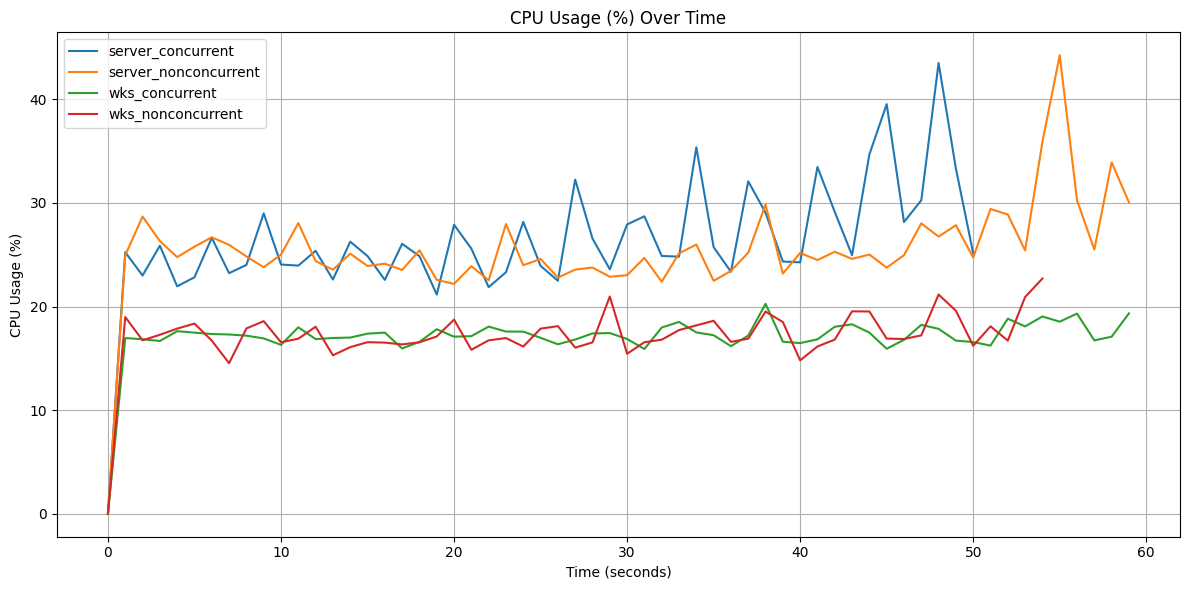

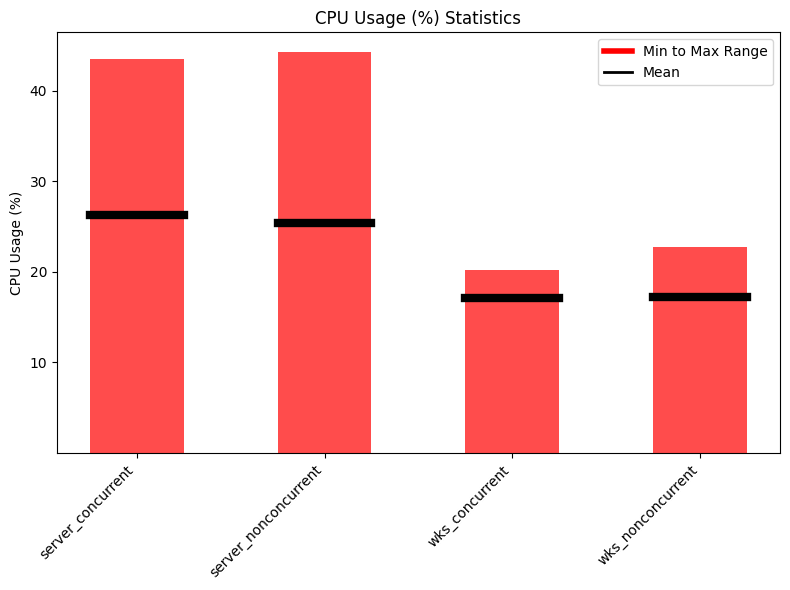

In [125]:
plot_counter_data(directory, "CPU Usage (%)")
plot_counter_bar_with_stats(directory, "CPU Usage (%)")

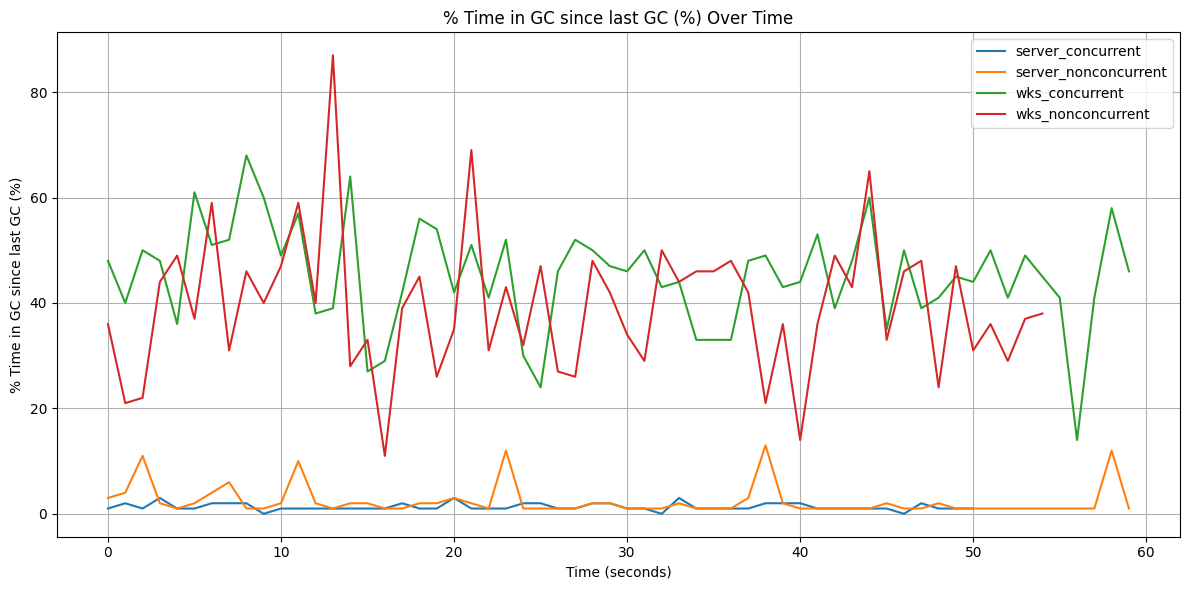

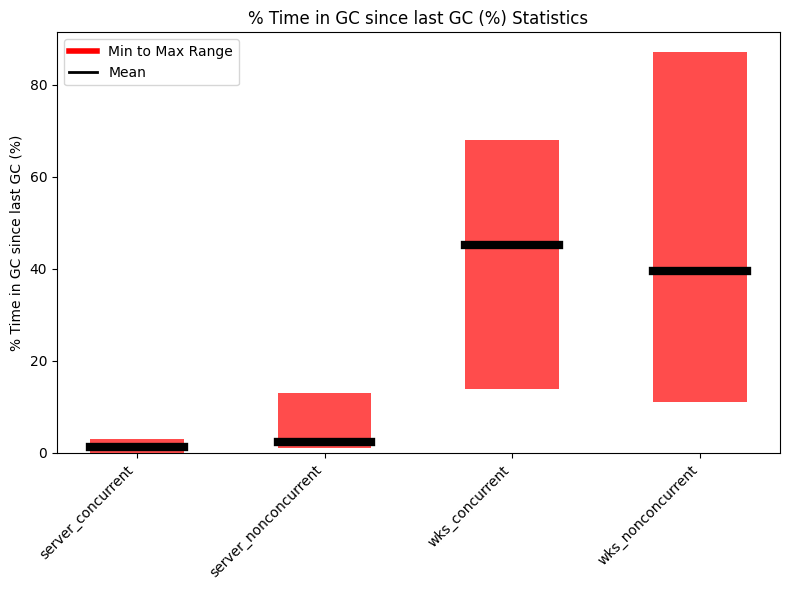

In [118]:
plot_counter_data(directory, "% Time in GC since last GC (%)")
plot_counter_bar_with_stats(directory, "% Time in GC since last GC (%)")

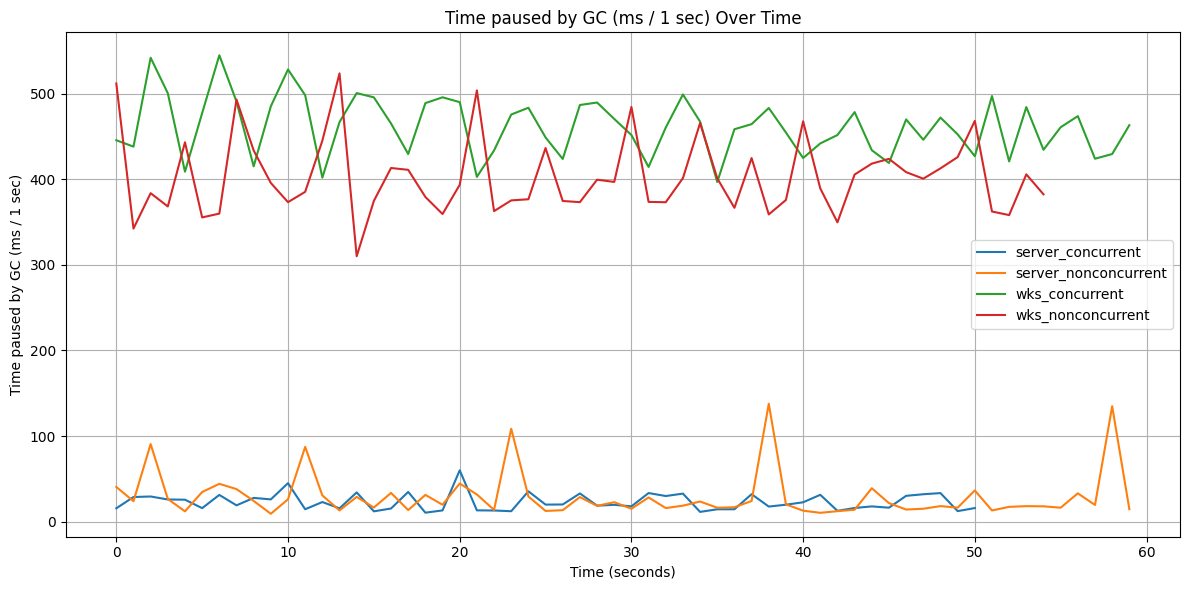

In [119]:
plot_counter_data(directory, "Time paused by GC (ms / 1 sec)")

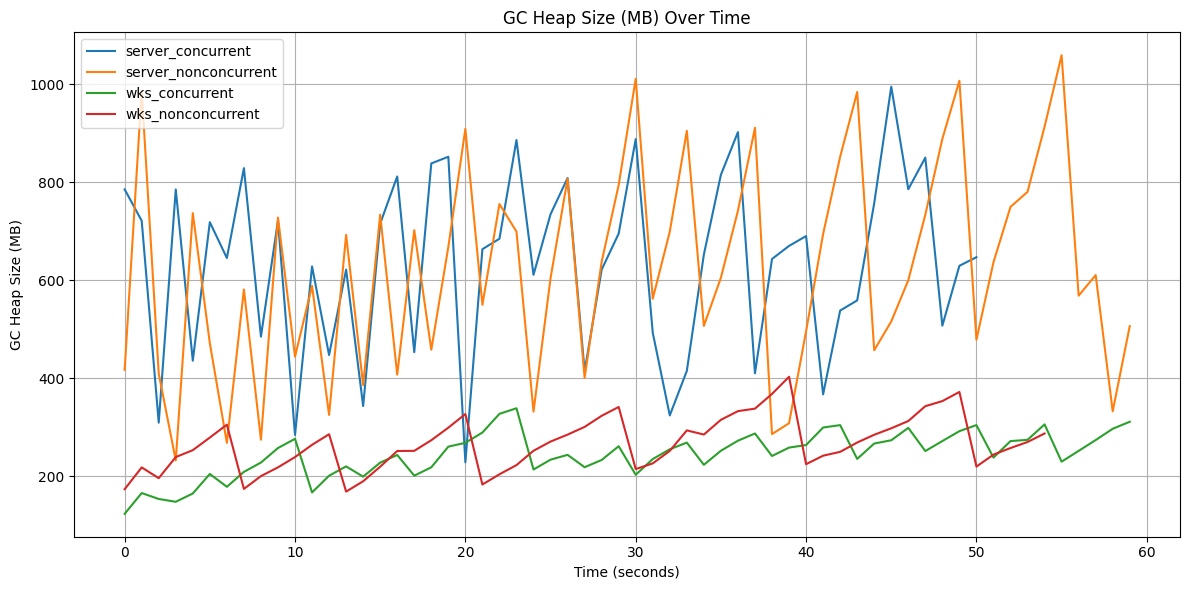

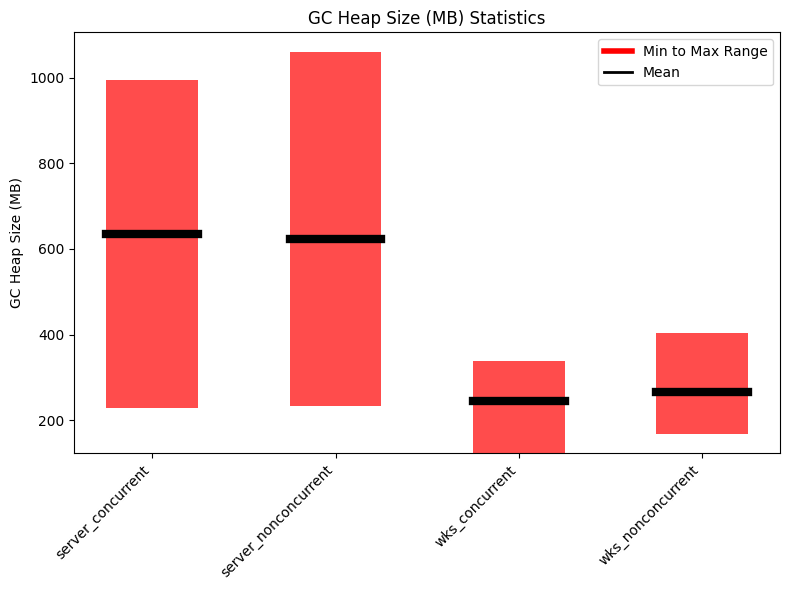

In [120]:
plot_counter_data(directory, "GC Heap Size (MB)")
plot_counter_bar_with_stats(directory, "GC Heap Size (MB)")

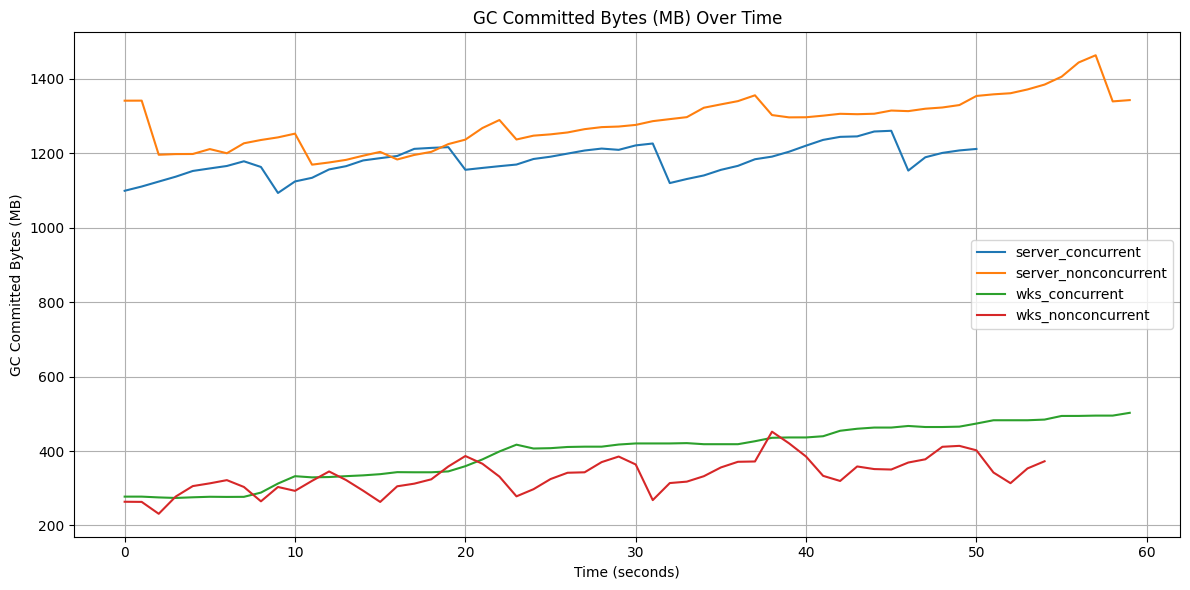

In [121]:
plot_counter_data(directory, "GC Committed Bytes (MB)")

# Trace

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import itertools
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

def plot_gc_stats(directory, column_to_plot, group_by=None):
   def process_file(filepath):
       df = pd.read_csv(filepath)
       filename = os.path.basename(filepath)
       series_name = filename.replace('nop_trace_', '').replace('.csv', '')

       df['Relative PauseStart'] = df['PauseStart'] - df['PauseStart'].min()

       return df, series_name

   processed_data = []
   for filename in os.listdir(directory):
       if filename.startswith('nop_trace_') and filename.endswith('.csv'):
           filepath = os.path.join(directory, filename)
           processed_data.append(process_file(filepath))

   fig, ax = plt.subplots(figsize=(12, 6))

   markers = itertools.cycle(['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'H', '+', 'x'])
   color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

   for i, (df, series_name) in enumerate(processed_data):
       color = color_cycle[i % len(color_cycle)]
       if group_by:
           grouped = df.groupby(group_by)
           for name, group in grouped:
               marker = next(markers)
               ax.plot(group['Relative PauseStart'], group[column_to_plot],
                       label=f'{series_name} - {name}',
                       marker=marker, color=color, linestyle='-', markersize=6)
       else:
           ax.plot(df['Relative PauseStart'], df[column_to_plot],
                   label=series_name, marker='o', color=color, linestyle='-', markersize=6)

   ax.set_xlabel('Relative Pause Start Time (ms)')
   ax.set_ylabel(column_to_plot)
   ax.set_title(f'{column_to_plot} over GC Collections')
   ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.grid(True)
   plt.tight_layout()
   plt.show()

def plot_gc_stats_bar_with_stats(directory, column_to_plot, group_by=None):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_trace_', '').replace('.csv', '')
        return df, series_name

    processed_data = []
    for filename in os.listdir(directory):
        if filename.startswith('nop_trace_') and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    fig, ax = plt.subplots(figsize=(12, 6))

    if group_by:
        grouped_data = []
        for df, series_name in processed_data:
            grouped = df.groupby(group_by)[column_to_plot]
            stats = grouped.agg(['min', 'mean', 'max'])
            for group, row in stats.iterrows():
                grouped_data.append((series_name, group, row['min'], row['mean'], row['max']))
    else:
        grouped_data = [(name, '', df[column_to_plot].min(), df[column_to_plot].mean(), df[column_to_plot].max())
                        for df, name in processed_data]

    x = np.arange(len(grouped_data))
    width = 0.8

    unique_series = list(set(data[0] for data in grouped_data))
    color_map = plt.cm.get_cmap('tab10')
    colors = [color_map(i/len(unique_series)) for i in range(len(unique_series))]
    series_color = dict(zip(unique_series, colors))

    for i, (series, group, min_val, mean_val, max_val) in enumerate(grouped_data):
        color = series_color[series]
        ax.bar(i, max_val - min_val, width, bottom=min_val, color=color, alpha=0.7)
        ax.plot([i-width/2, i+width/2], [mean_val, mean_val], color='black', linewidth=2)

    ax.set_ylabel(column_to_plot)
    ax.set_title(f'{column_to_plot} Statistics')
    ax.set_xticks(x)
    ax.set_xticklabels([f"{data[0]}-{data[1]}" if data[1] else data[0] for data in grouped_data], rotation=45, ha='right')

    custom_lines = [Line2D([0], [0], color=color, lw=4) for color in colors]
    custom_lines.append(Line2D([0], [0], color='black', lw=2))
    ax.legend(custom_lines, unique_series + ['Mean'], loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

def plot_gc_stats_percentiles(directory, column_to_plot='PauseMSec'):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_trace_', '').replace('.csv', '')
        return df, series_name

    processed_data = []
    for filename in os.listdir(directory):
        if filename.startswith('nop_trace_') and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    fig, ax = plt.subplots(figsize=(12, 6))

    colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(processed_data)))

    for (df, series_name), color in zip(processed_data, colors):
        percentiles = 1 - 10**np.linspace(-4, -1, 100)
        values = np.percentile(df[column_to_plot], percentiles * 100)
        ax.semilogx(1 - percentiles, values, label=series_name, color=color, base=10)

    ax.set_xlim(1e-4, 1e-1)
    ax.invert_xaxis()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{(1-x):,.2%}'))
    ax.set_xlabel('Percentile')
    ax.set_ylabel(column_to_plot)
    ax.set_title(f'{column_to_plot} Percentiles')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

def plot_gc_histogram(directory):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_trace_', '').replace('.csv', '')
        return df, series_name

    processed_data = []
    for filename in os.listdir(directory):
        if filename.startswith('nop_trace_') and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    fig, ax = plt.subplots(figsize=(12, 6))

    grouped_data = []
    all_generations = set()
    for df, series_name in processed_data:
        grouped = df['Gen'].value_counts()
        grouped_data.append((series_name, grouped))
        all_generations.update(grouped.index)

    all_generations = sorted(all_generations)
    x = np.arange(len(all_generations))
    width = 0.8 / len(processed_data)

    grayscale = plt.cm.get_cmap('Greys')
    patterns = ['/', '\\', 'x', '+', '-', '*', 'o', 'O', '.']

    for i, (series_name, data) in enumerate(grouped_data):
        color = grayscale(0.3 + (i * 0.5 / len(processed_data)))
        values = [data.get(gen, 0) for gen in all_generations]
        ax.bar(x + i*width, values, width, label=series_name,
               color=color, edgecolor='black', hatch=patterns[i % len(patterns)])

    ax.set_ylabel('Number of GC occurrences')
    ax.set_title('GC Occurrences by Generation')
    ax.set_xticks(x + width * (len(processed_data) - 1) / 2)
    ax.set_xticklabels(all_generations)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.tight_layout()
    plt.show()

directory = '/content/drive/MyDrive/Colab Notebooks/benchmarks'

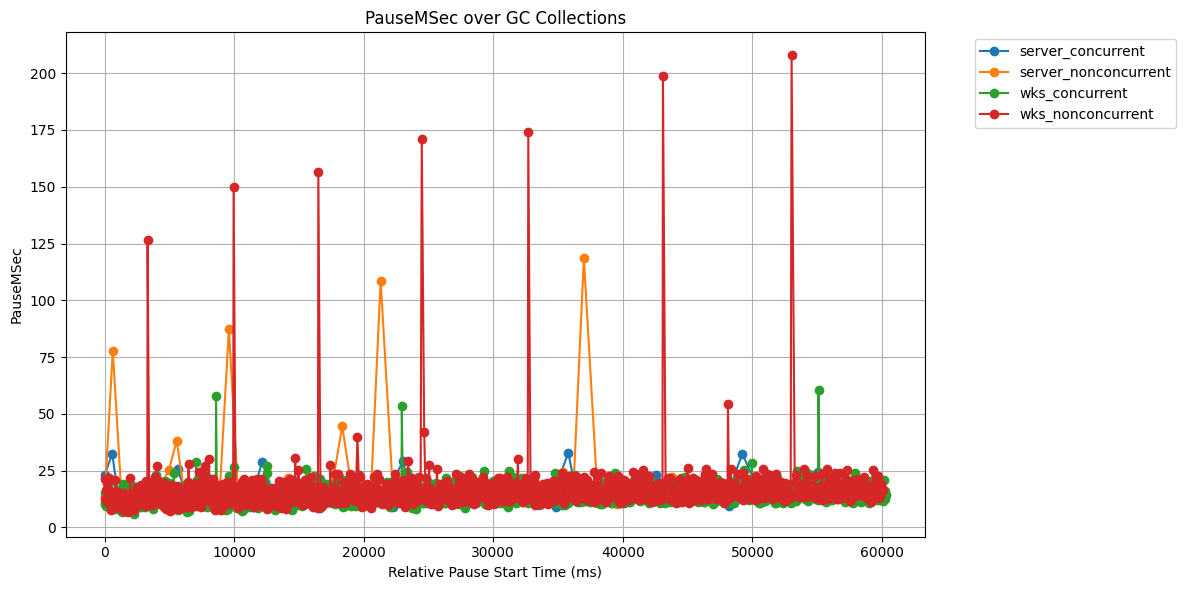

<ipython-input-126-e65995d0bd7a>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


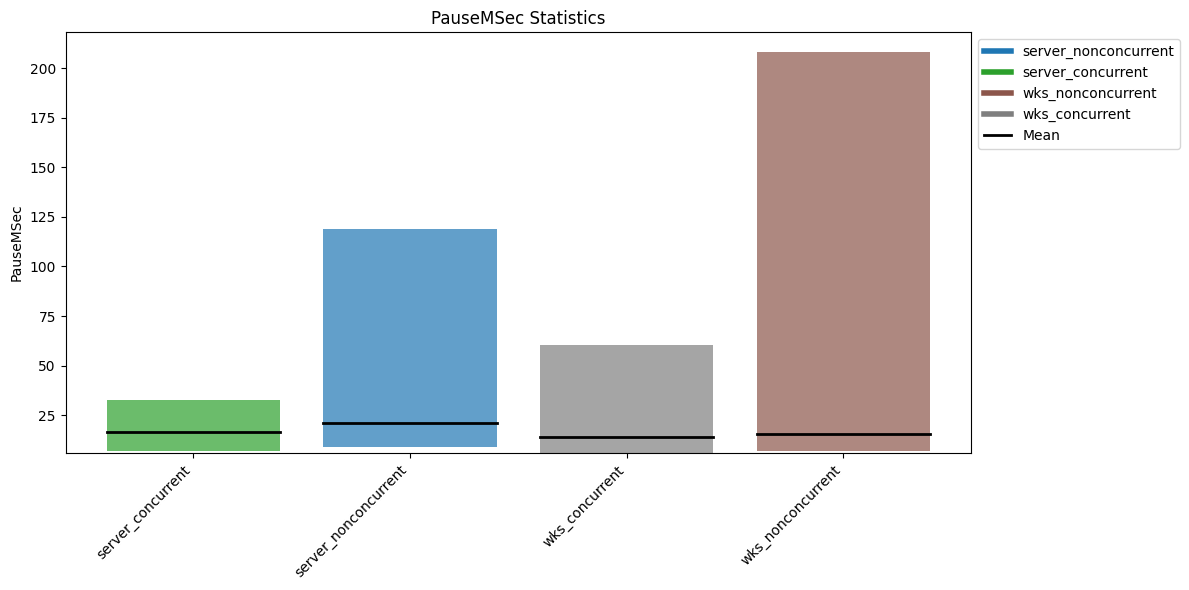

In [127]:
plot_gc_stats(directory, 'PauseMSec')
plot_gc_stats_bar_with_stats(directory, 'PauseMSec')

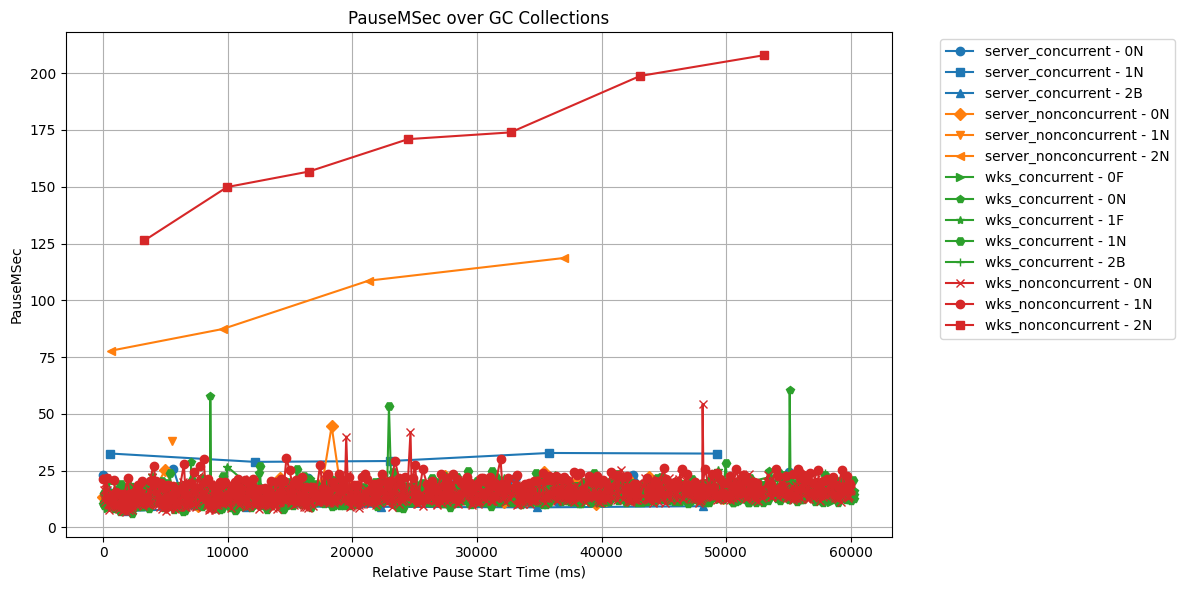

<ipython-input-126-e65995d0bd7a>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


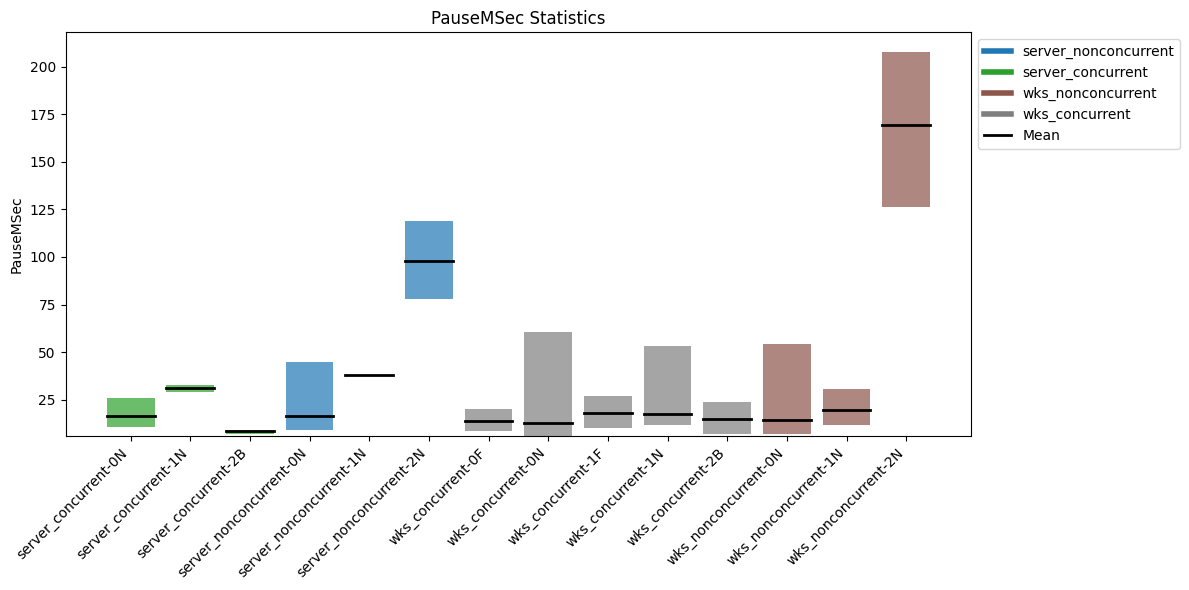

In [128]:
plot_gc_stats(directory, 'PauseMSec', group_by='Gen')
plot_gc_stats_bar_with_stats(directory, 'PauseMSec', group_by='Gen')

<ipython-input-126-e65995d0bd7a>:161: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  grayscale = plt.cm.get_cmap('Greys')


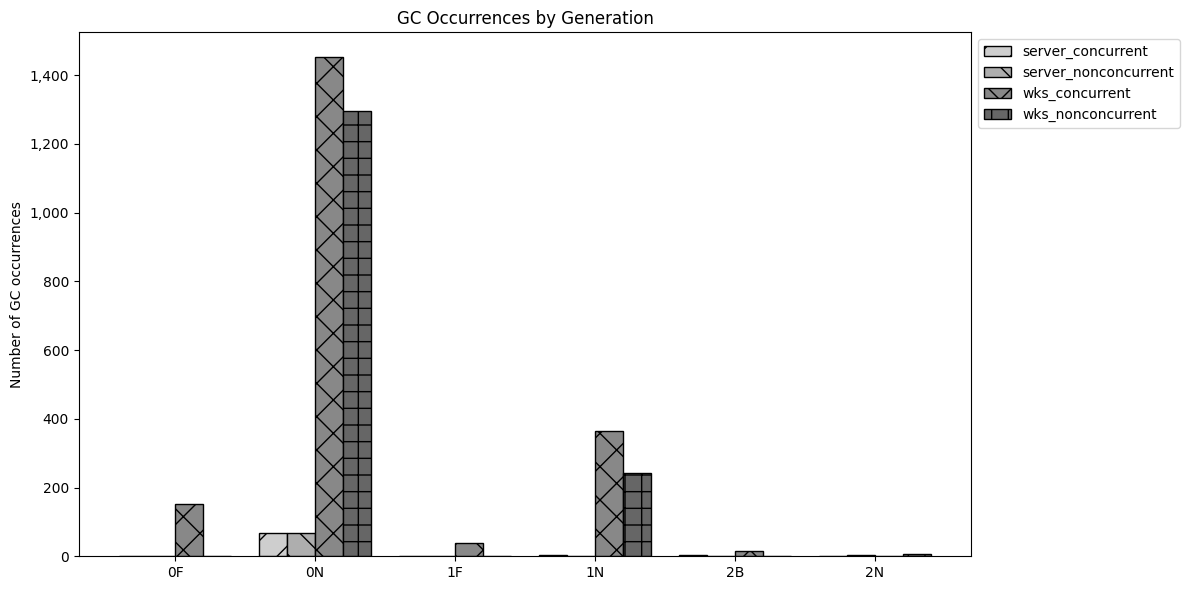

In [129]:
plot_gc_histogram(directory)

<ipython-input-126-e65995d0bd7a>:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(processed_data)))


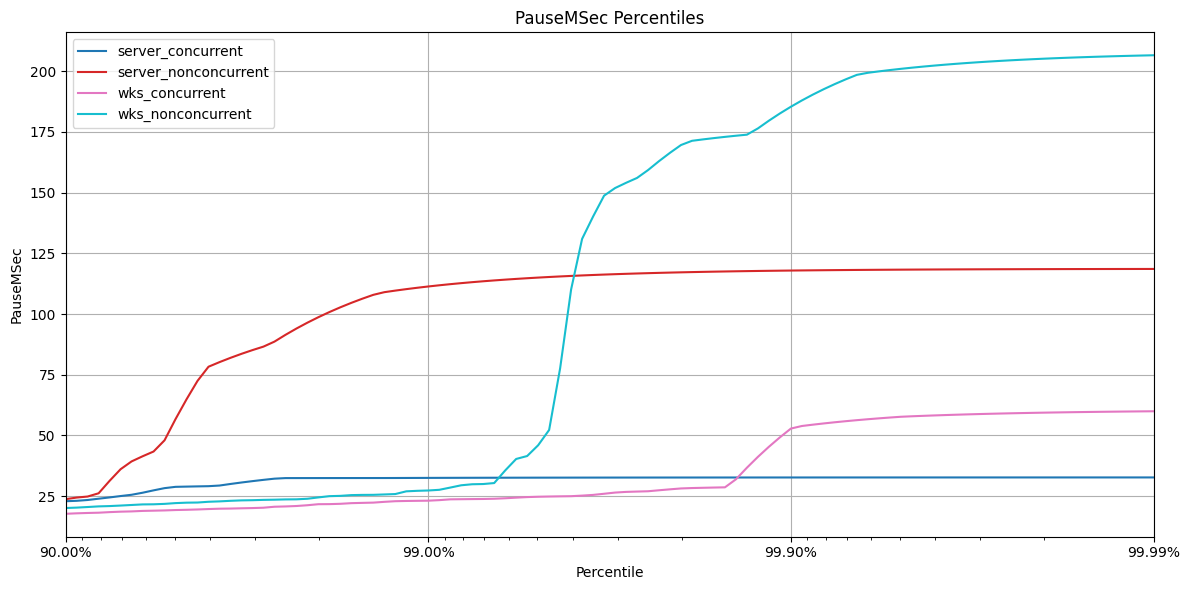

In [130]:
plot_gc_stats_percentiles(directory)

# Client

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

def plot_jmeter_elapsed_time(directory, trim_start=0, trim_end=0):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
        df = df.sort_values('timeStamp')
        df['relativeTime'] = (df['timeStamp'] - df['timeStamp'].min()).dt.total_seconds()
        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_jmeter_', '').replace('.csv', '')
        return df, series_name

    processed_data = []
    for filename in os.listdir(directory):
        if filename.startswith('nop_jmeter_') and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    labels = set()
    for df, _ in processed_data:
        labels.update(df['label'].unique())

    colors = plt.cm.get_cmap('tab10')

    for label in labels:
        plt.figure(figsize=(12, 6))
        for i, (df, series_name) in enumerate(processed_data):
            label_data = df[df['label'] == label]

            # Trim data
            start_time = label_data['timeStamp'].min() + pd.Timedelta(seconds=trim_start)
            end_time = label_data['timeStamp'].max() - pd.Timedelta(seconds=trim_end)
            trimmed_data = label_data[(label_data['timeStamp'] >= start_time) &
                                      (label_data['timeStamp'] <= end_time)]

            plt.scatter(trimmed_data['relativeTime'], trimmed_data['elapsed'],
                        label=series_name, color=colors(i/len(processed_data)), alpha=0.7)
            plt.plot(trimmed_data['relativeTime'], trimmed_data['elapsed'],
                     color=colors(i/len(processed_data)), alpha=0.5)

        plt.xlabel('Relative Time (seconds)')
        plt.ylabel('Elapsed Time (ms)')
        plt.title(f'Elapsed Time for {label}\n(Trimmed: {trim_start}s start, {trim_end}s end)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_jmeter_elapsed_percentiles(directory, trim_start=0, trim_end=0):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
        df = df.sort_values('timeStamp')
        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_jmeter_', '').replace('.csv', '')
        return df, series_name

    processed_data = []
    for filename in os.listdir(directory):
        if filename.startswith('nop_jmeter_') and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    labels = set()
    for df, _ in processed_data:
        labels.update(df['label'].unique())

    colors = plt.cm.get_cmap('tab10')

    for label in labels:
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, (df, series_name) in enumerate(processed_data):
            label_data = df[df['label'] == label]

            # Trim data
            start_time = label_data['timeStamp'].min() + pd.Timedelta(seconds=trim_start)
            end_time = label_data['timeStamp'].max() - pd.Timedelta(seconds=trim_end)
            trimmed_data = label_data[(label_data['timeStamp'] >= start_time) &
                                      (label_data['timeStamp'] <= end_time)]

            percentiles = 1 - 10**np.linspace(-4, -1, 100)
            elapsed_percentiles = np.percentile(trimmed_data['elapsed'], percentiles * 100)

            ax.semilogx(1 - percentiles, elapsed_percentiles, label=series_name, color=colors(i/len(processed_data)), base=10)

        ax.set_xlim(1e-4, 1e-1)
        ax.invert_xaxis()
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{(1-x):,.2%}'))
        ax.set_xlabel('Percentile')
        ax.set_ylabel('Elapsed Time (ms)')
        ax.set_title(f'Elapsed Time Percentiles for {label}\n(Trimmed: {trim_start}s start, {trim_end}s end)')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

def plot_jmeter_bar_with_stats(directory, trim_start=0, trim_end=0):
    def process_file(filepath):
        df = pd.read_csv(filepath)
        df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
        df = df.sort_values('timeStamp')
        filename = os.path.basename(filepath)
        series_name = filename.replace('nop_jmeter_', '').replace('.csv', '')
        return df, series_name

    processed_data = []
    for filename in os.listdir(directory):
        if filename.startswith('nop_jmeter_') and filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            processed_data.append(process_file(filepath))

    labels = sorted(set(label for df, _ in processed_data for label in df['label'].unique()))
    series_names = [name for _, name in processed_data]

    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.8 / len(processed_data)
    index = np.arange(len(labels))

    colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(processed_data)))

    for i, ((df, series_name), color) in enumerate(zip(processed_data, colors)):
        stats = []
        for label in labels:
            label_data = df[df['label'] == label]

            # Trim data
            start_time = label_data['timeStamp'].min() + pd.Timedelta(seconds=trim_start)
            end_time = label_data['timeStamp'].max() - pd.Timedelta(seconds=trim_end)
            trimmed_data = label_data[(label_data['timeStamp'] >= start_time) &
                                      (label_data['timeStamp'] <= end_time)]

            stats.append({
                'min': trimmed_data['elapsed'].min(),
                'max': trimmed_data['elapsed'].max(),
                'mean': trimmed_data['elapsed'].mean()
            })

        mins = [s['min'] for s in stats]
        maxs = [s['max'] for s in stats]
        means = [s['mean'] for s in stats]

        x = index + i * bar_width
        ax.bar(x, np.array(maxs) - np.array(mins), bar_width,
               bottom=mins, label=series_name, color=color, alpha=0.7)

        # Plot mean as a horizontal line
        for j, mean in enumerate(means):
            ax.plot([x[j] - bar_width/2, x[j] + bar_width/2], [mean, mean], color='black', linewidth=2)

    ax.set_xlabel('Label')
    ax.set_ylabel('Elapsed Time (ms)')
    ax.set_title(f'Elapsed Time Statistics\n(Trimmed: {trim_start}s start, {trim_end}s end)')
    ax.set_xticks(index + bar_width * (len(processed_data) - 1) / 2)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    # Custom legend
    handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.7) for color in colors]
    handles.append(Line2D([0], [0], color='black', linewidth=2))
    ax.legend(handles, series_names + ['Mean'], loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

directory = '/content/drive/MyDrive/Colab Notebooks/benchmarks'

<ipython-input-131-75075fd76936>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')


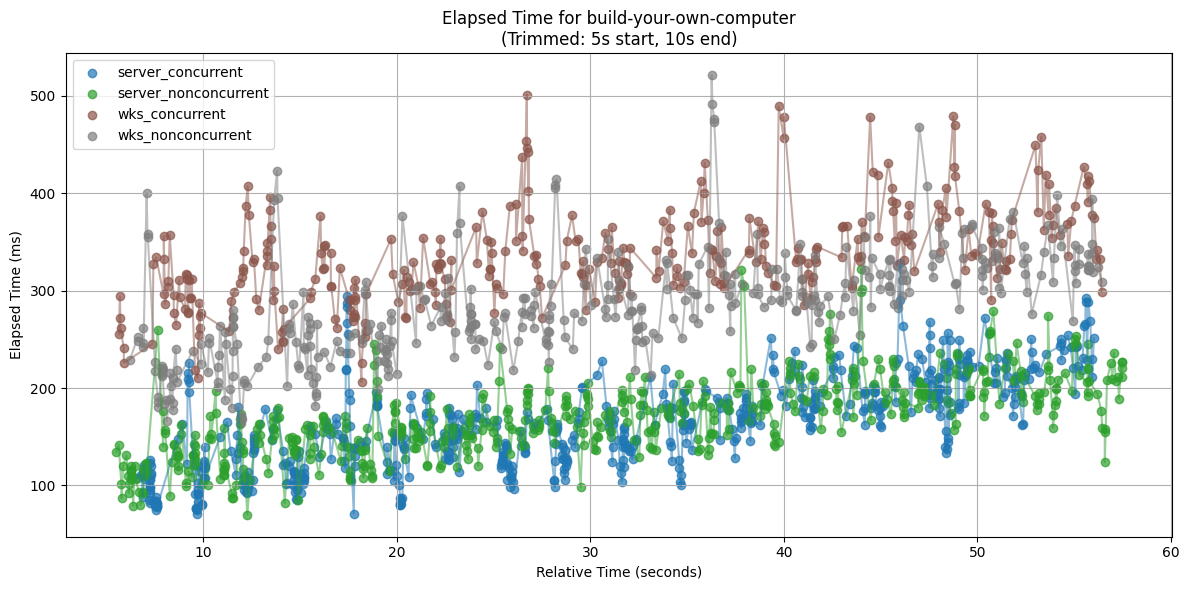

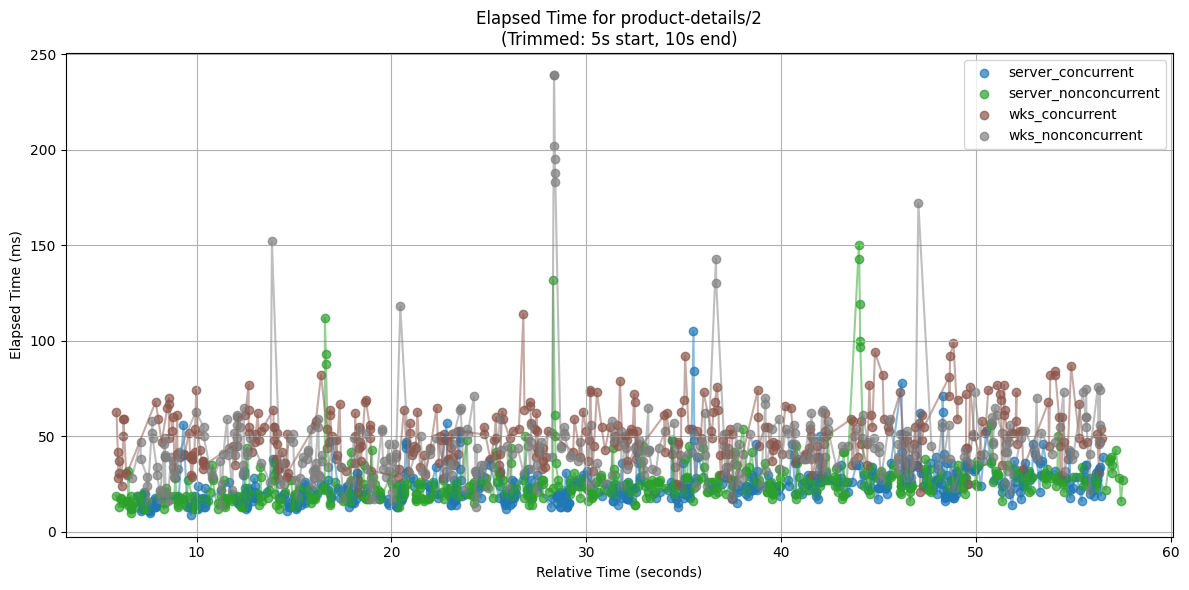

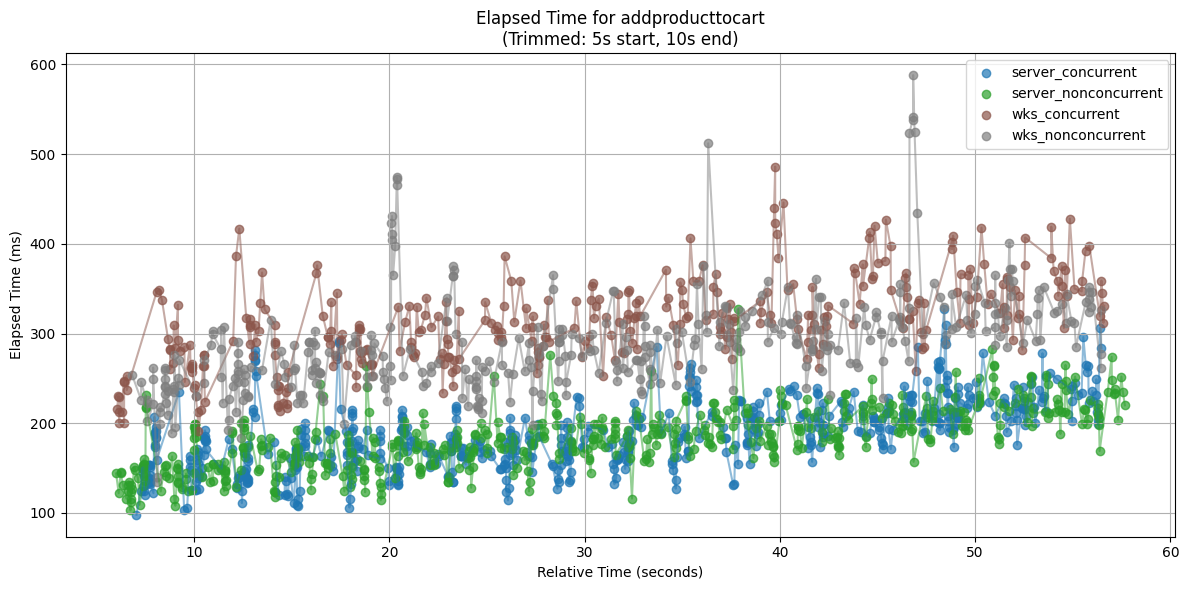

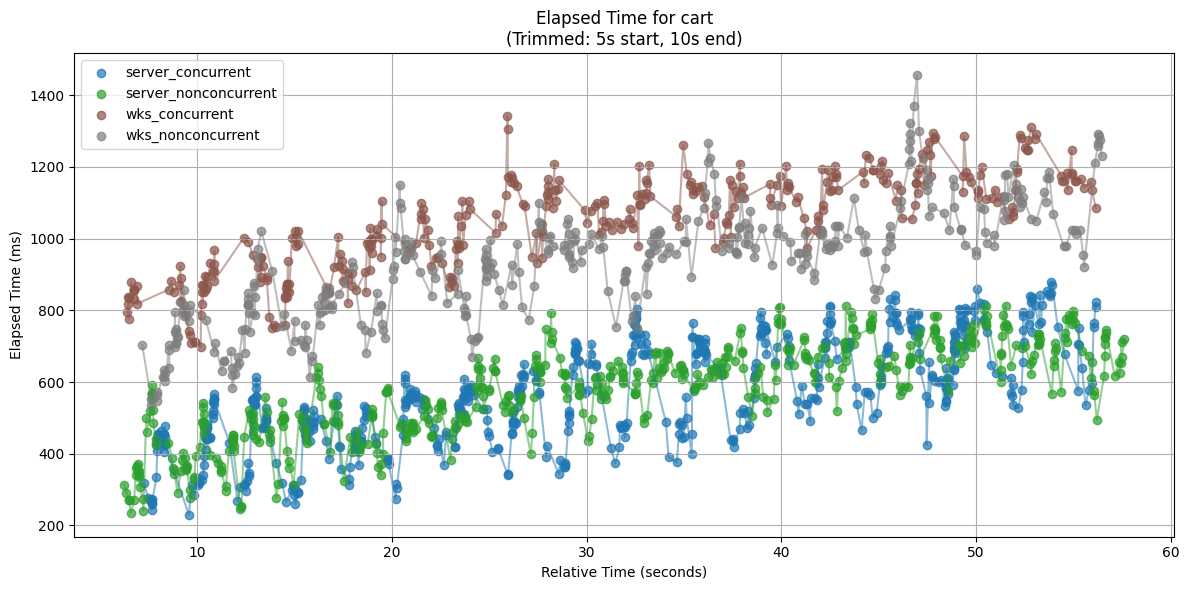

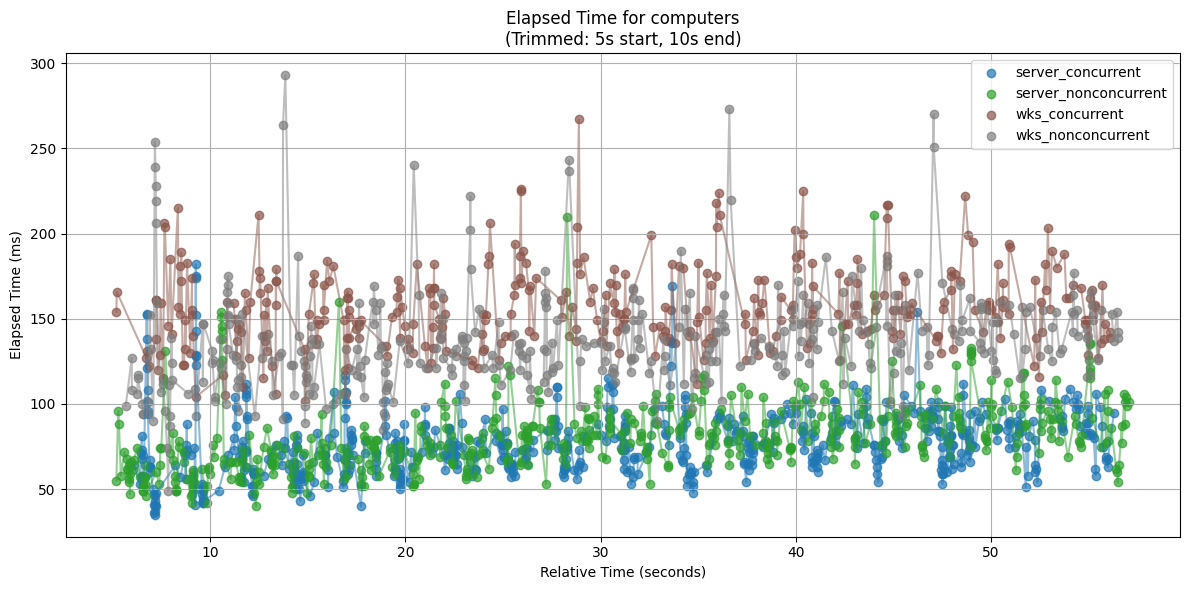

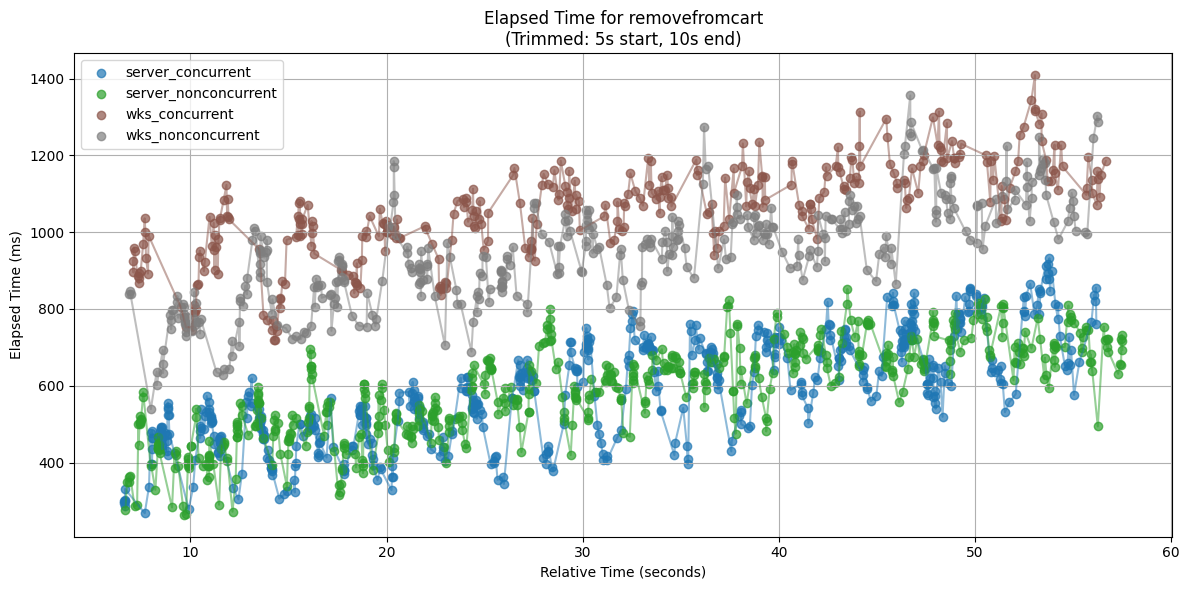

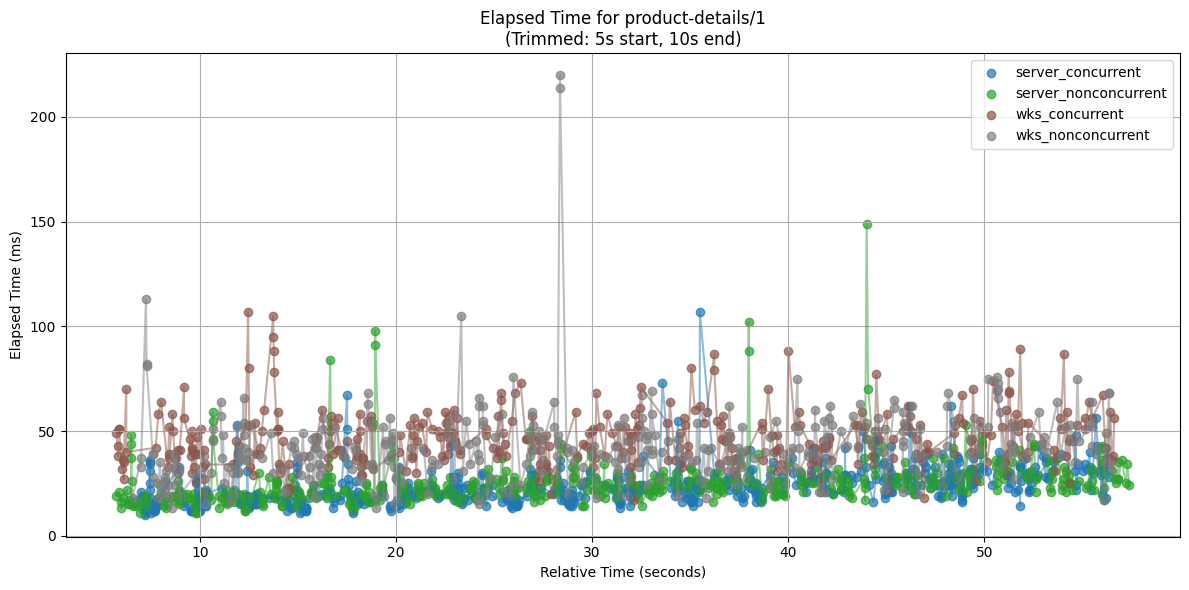

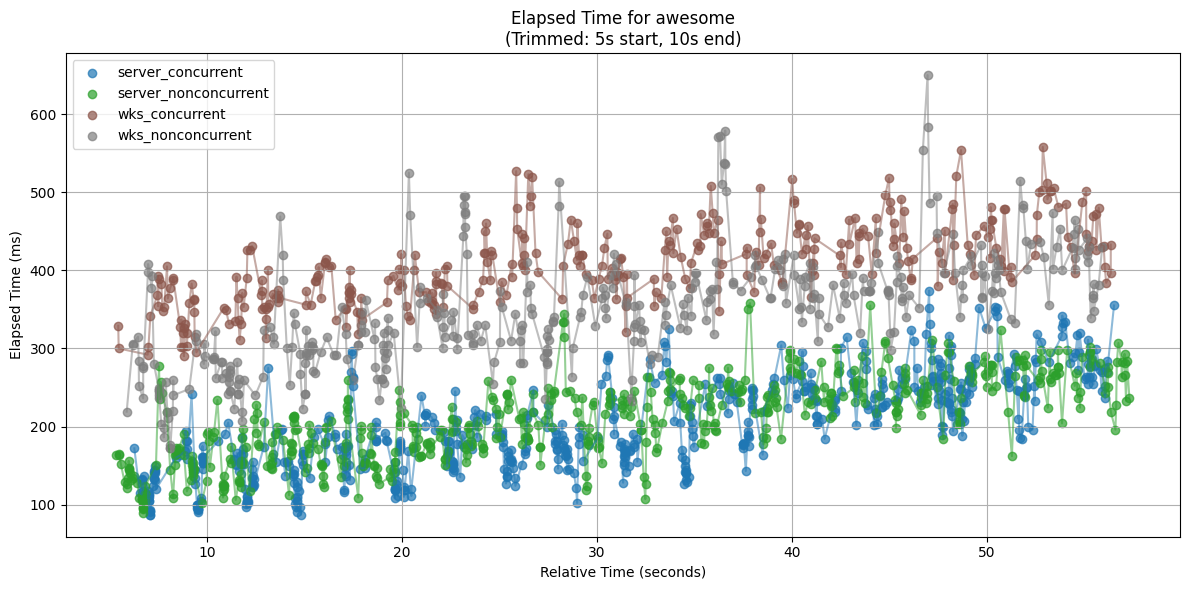

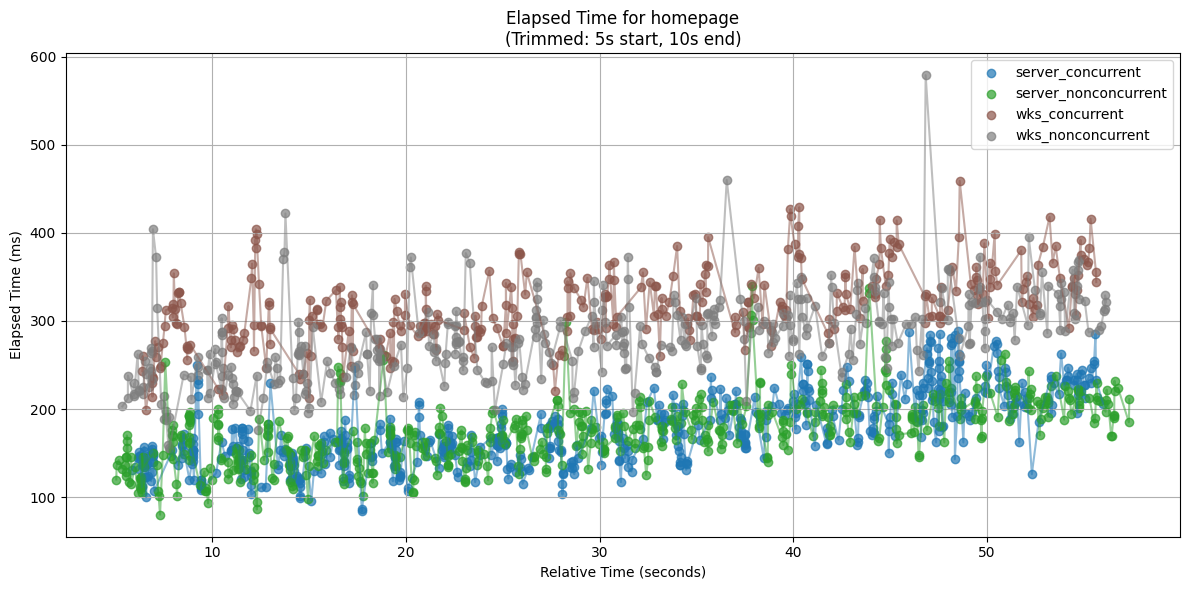

In [132]:
plot_jmeter_elapsed_time(directory, trim_start=5, trim_end=10)

<ipython-input-131-75075fd76936>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(processed_data)))


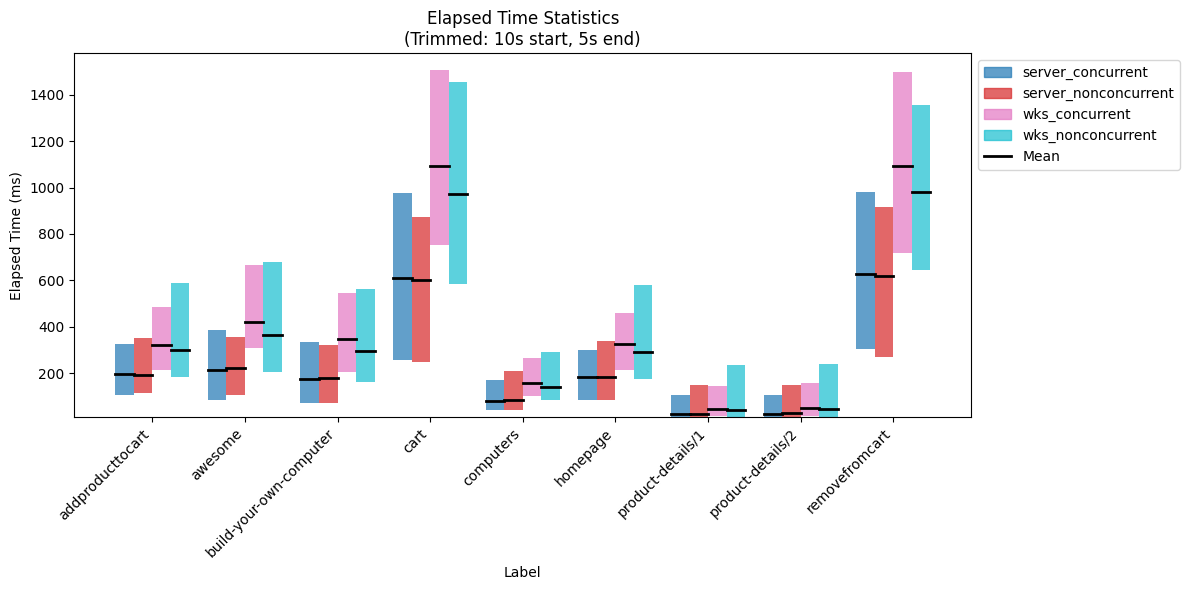

In [133]:
plot_jmeter_bar_with_stats(directory, trim_start=10, trim_end=5)

<ipython-input-131-75075fd76936>:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')


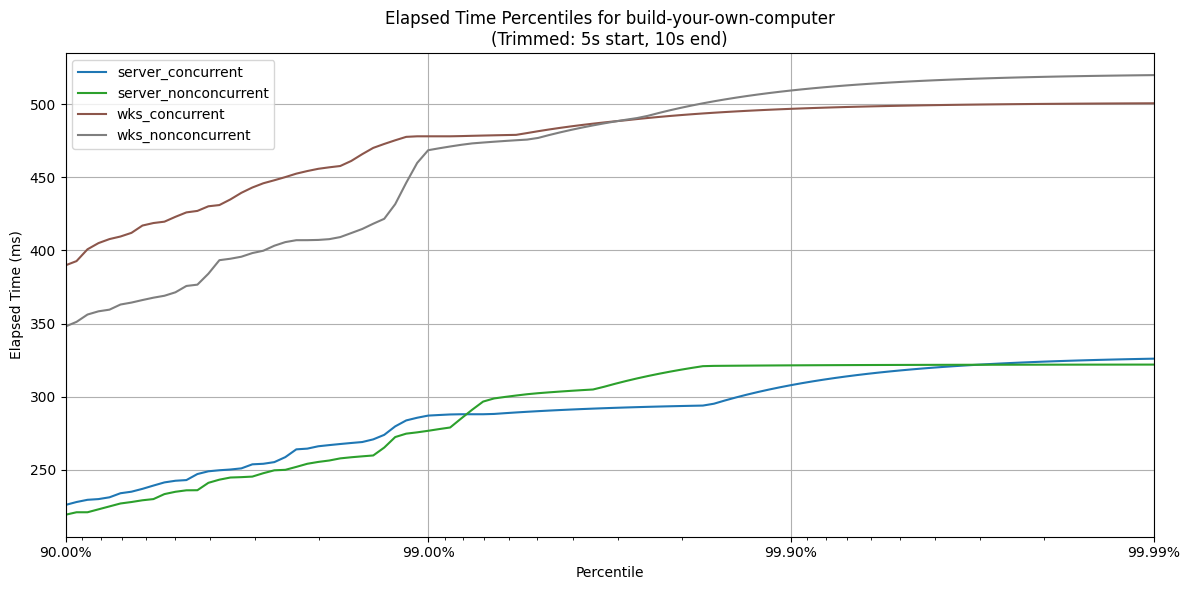

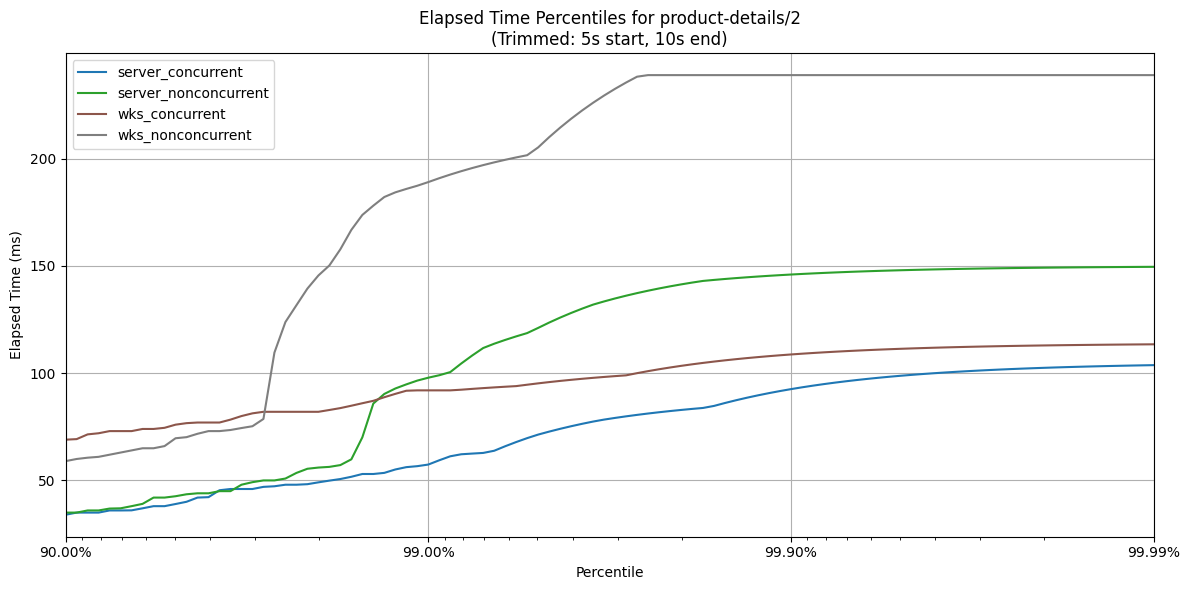

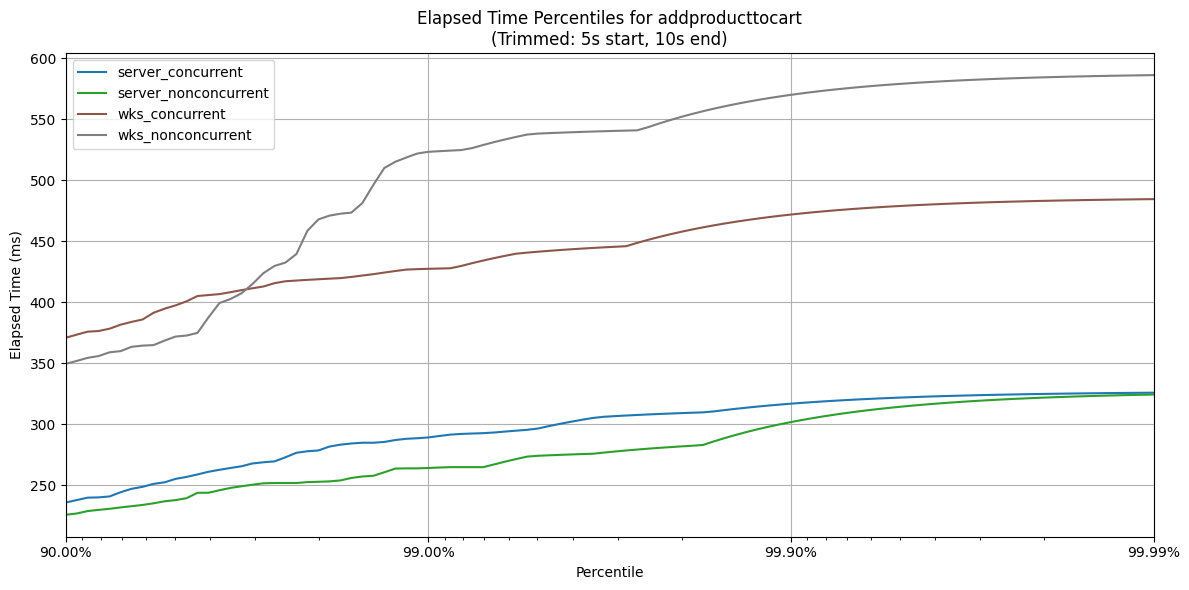

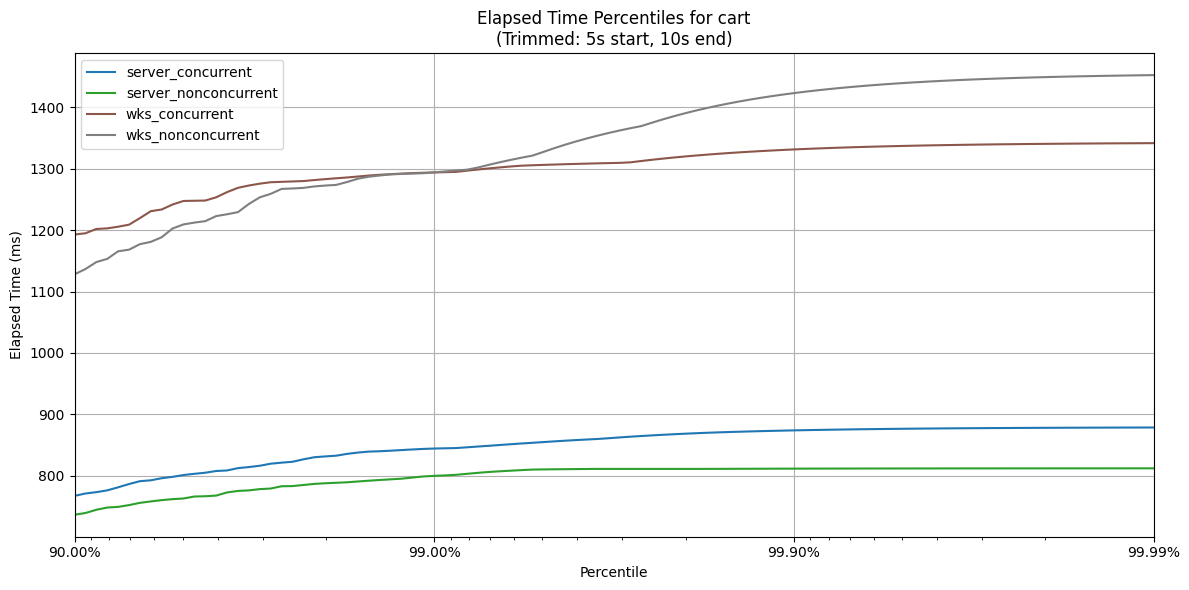

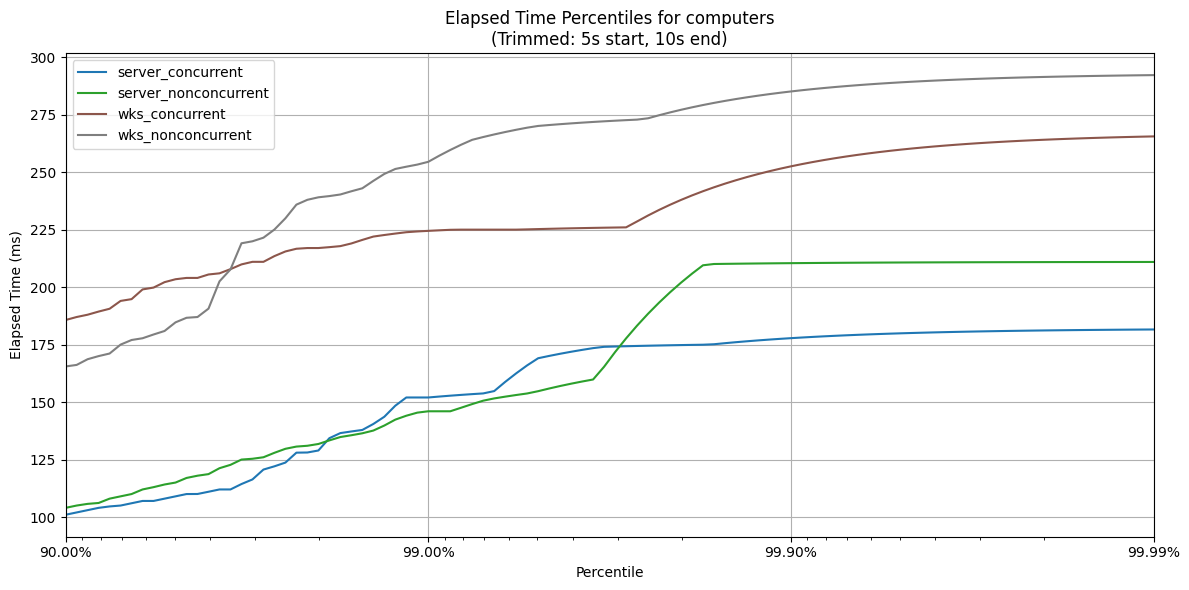

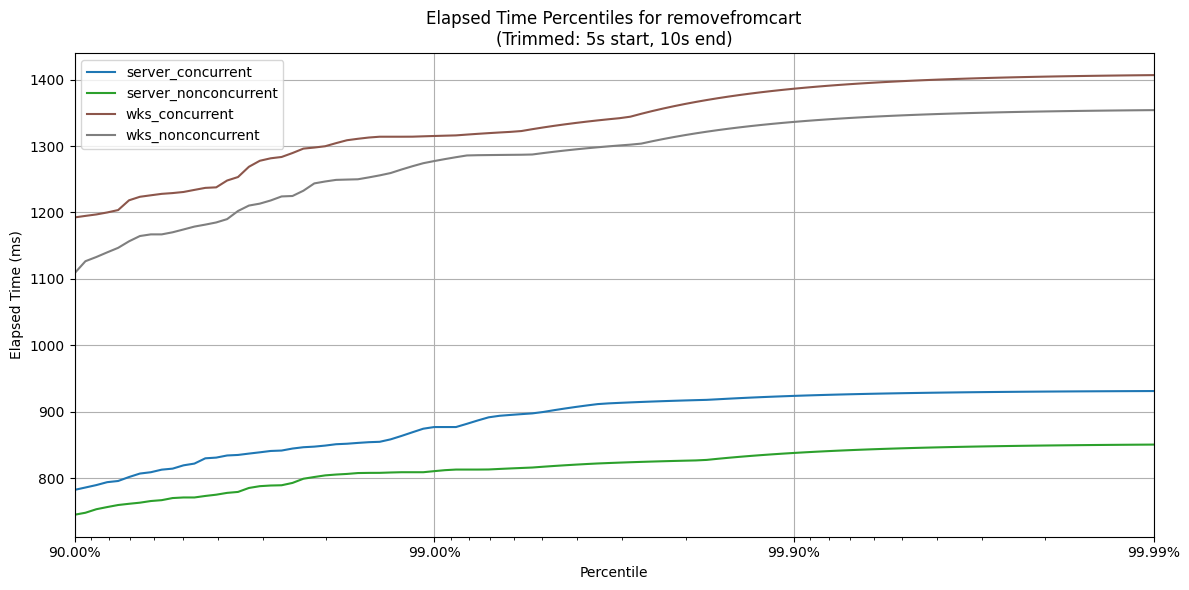

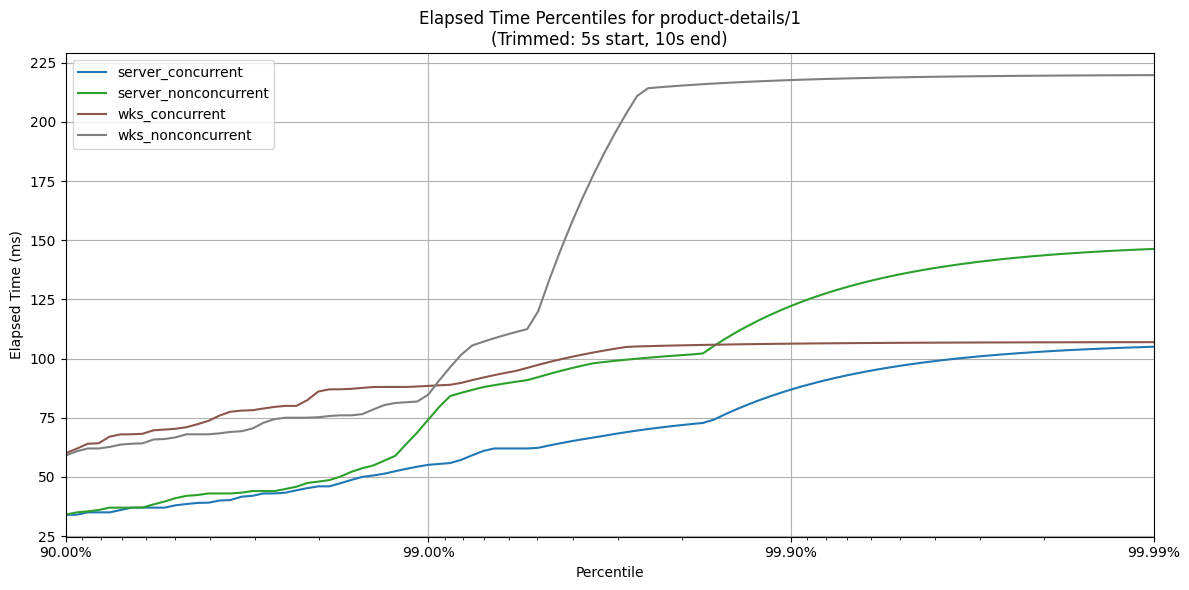

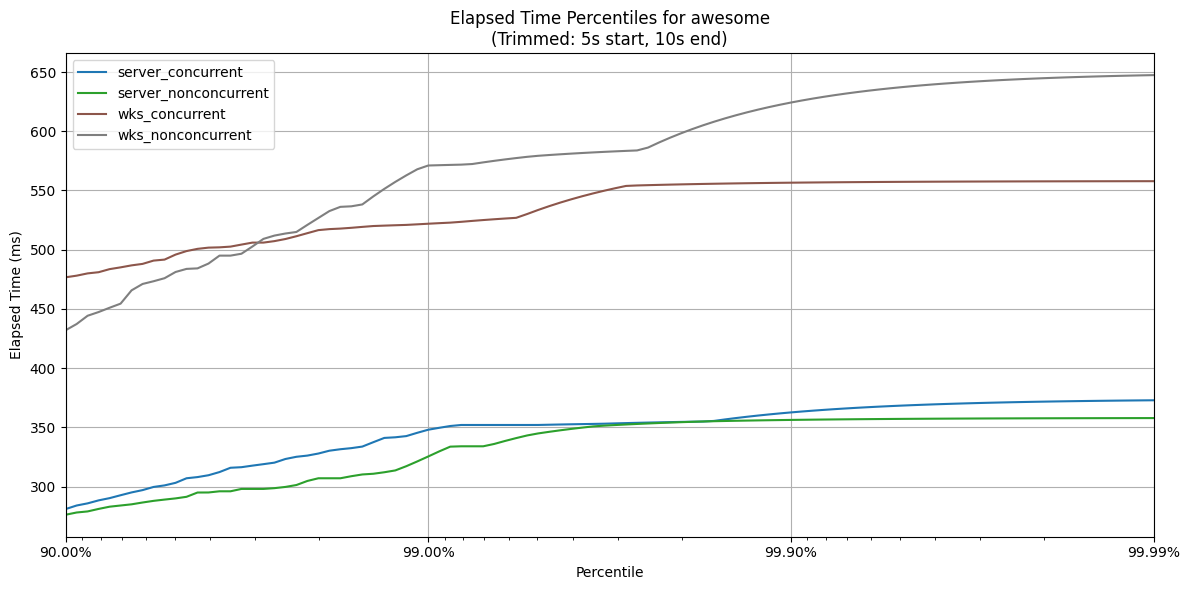

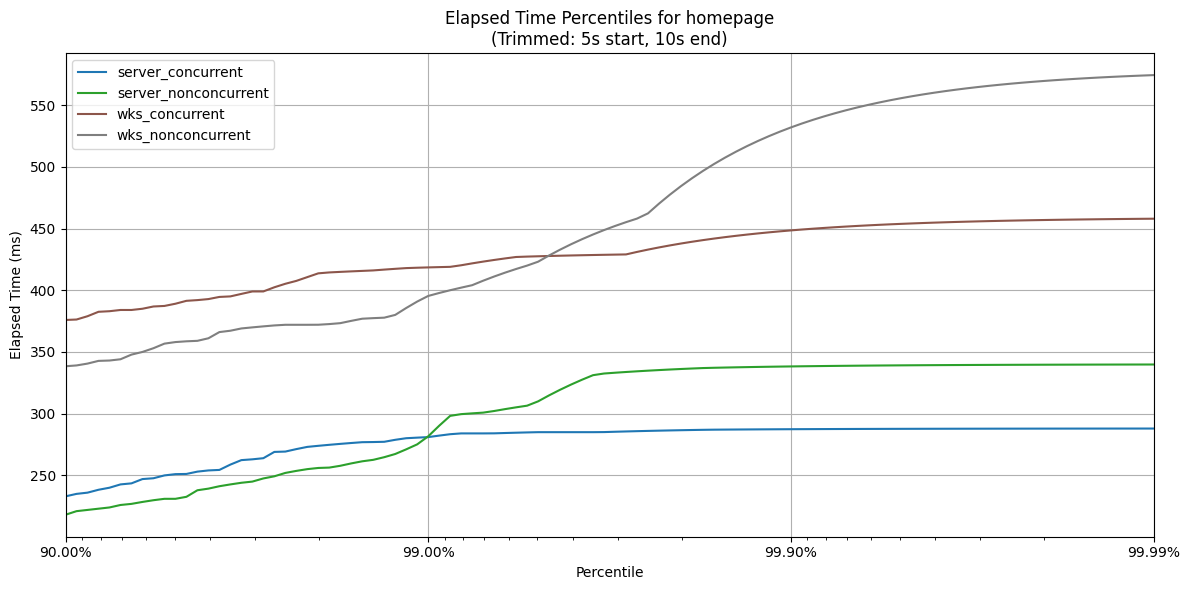

In [134]:
plot_jmeter_elapsed_percentiles(directory, trim_start=5, trim_end=10)